In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv('/content/train.csv')
df.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000


In [77]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [79]:
columns=df.columns.tolist()
columns

['id',
 'brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [80]:
cat_columns=df.select_dtypes(include='object').columns
cat_columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [81]:
for col in cat_columns:
    print("-----------------------")
    print(col)
    try:
        print(df[col].unique())
        #print(df[col].value_counts())
          # Wrap in a try-except block for safer handling
    except KeyError:
        print("Column", col, "does not exist in the DataFrame.")

-----------------------
brand
['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']
-----------------------
model
['F-150 Lariat' '335 i' 'XF Luxury' ... 'Q4 e-tron Sportback Premium'
 'Countryman Cooper' 'S-10 LS']
-----------------------
fuel_type
['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' '–' 'Plug-In Hybrid'
 'not supported']
-----------------------
engine
['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'
 '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel'
 '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel' ... '3.0L'
 '3.0 Liter GTDI' '120.0HP 

In [82]:
df.drop(['id','clean_title','model'],inplace=True,axis=1)

In [83]:
df.head(2)

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250


In [84]:
import re

In [85]:
re.search(r"^\d+", df['transmission'][0]).group()

'10'

In [86]:
re.search(r"(?i)A/T|M/T|At|Mt|Auto|Manu", df['transmission'][0]).group()

'A/T'

In [87]:
match = re.search(r"(\d+\.\d+)HP", df['engine'][0])
match.group(1)

'375.0'

In [88]:
df['milage'].describe()

count     54273.000000
mean      72746.175667
std       50469.490448
min         100.000000
25%       32268.000000
50%       66107.000000
75%      102000.000000
max      405000.000000
Name: milage, dtype: float64

(array([1.6529e+04, 1.7062e+04, 1.1477e+04, 6.1090e+03, 2.3110e+03,
        5.3800e+02, 1.9300e+02, 3.7000e+01, 9.0000e+00, 8.0000e+00]),
 array([1.0000e+02, 4.0590e+04, 8.1080e+04, 1.2157e+05, 1.6206e+05,
        2.0255e+05, 2.4304e+05, 2.8353e+05, 3.2402e+05, 3.6451e+05,
        4.0500e+05]),
 <BarContainer object of 10 artists>)

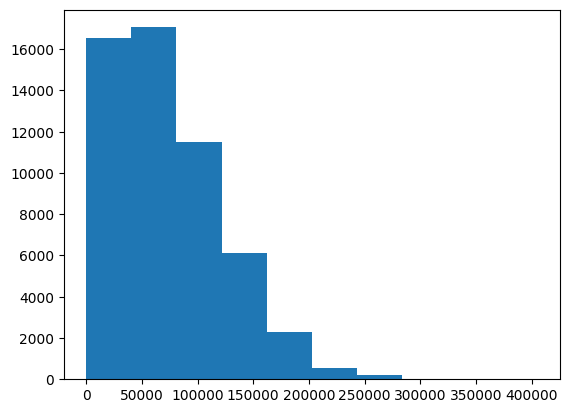

In [89]:
plt.hist(df['milage'])

In [90]:
q1 = np.percentile(df['milage'], 25)
q3 = np.percentile(df['milage'], 75)

iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


In [91]:
df_red=df[(df['milage'] > lower_bound) | (df['milage'] < upper_bound)]


In [92]:
df_red.head(2)

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250


In [93]:
df['engine'].value_counts()

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    1452
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1125
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1054
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             979
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              893
                                                         ... 
4.4 Liter GDI DOHC Twin Turbo                               1
3.0 Liter Twin Turbo                                        1
150.0HP 2.0L 4 Cylinder Engine Diesel Fuel                  1
266.0HP Electric Motor Electric Fuel System                 1
151.0HP Electric Motor Hydrogen Fuel                        1
Name: count, Length: 1061, dtype: int64

In [94]:
#df['engine'].apply(lambda x: (re.search(r"(\d+\.\d+)HP", x).group()))

In [95]:
#df['transmission'].apply(lambda x: re.search(r"^\d+", x).group())

In [96]:
re.search(r"(?i)A/T|M/T|At|Mt|Auto|Manu", df['transmission'][0]).group()

def extract_a_m(cell_value):
    try:
        match = re.search(r"(?i)A/T|M/T|At|Mt|Auto|Manu", cell_value)
        return match.group()
    except AttributeError:
        return None


df_red['trans_a_m'] = df_red['transmission'].apply(extract_a_m)

In [97]:
def extract_transmission(cell_value):
    try:
        match = re.search(r"^\d+",cell_value)
        return float(match.group())
    except AttributeError:
        return None


df_red['no_trans'] = df_red['transmission'].apply(extract_transmission)

In [98]:
def extract_horsepower(cell_value):
    try:
        match = re.search(r"(\d+\.\d+)HP", cell_value)
        return float(match.group(1))
    except AttributeError:
        return None

# Apply the function with error handling
df_red['hp'] = df_red['engine'].apply(extract_horsepower)


In [99]:
df_red.drop(['engine','transmission','brand','ext_col','int_col'],inplace=True,axis=1)

In [100]:
df_red['trans_a_m']=df_red['trans_a_m'].map({'A/T':1,'M/T':2,'Auto':1,'Manu':2,'At':1,'Mt':2})

In [101]:
df_red['accident'].value_counts()

accident
None reported                             39896
At least 1 accident or damage reported    14377
Name: count, dtype: int64

In [102]:
df_red['accident']=df_red['accident'].map({'None reported':0,'At least 1 accident or damage reported':1})

In [103]:
df_red.head(3)

,model_year,milage,fuel_type,accident,price,trans_a_m,no_trans,hp
0,2018,74349,Gasoline,0,11000,1.0,10.0,375.0
1,2007,80000,Gasoline,0,8250,2.0,6.0,300.0
2,2009,91491,Gasoline,0,15000,1.0,6.0,300.0


In [104]:
df_red=pd.get_dummies(df_red,drop_first=True,dtype=float,sparse=True).dropna()
df_red

,model_year,milage,accident,price,trans_a_m,no_trans,hp,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–
0,2018,74349,0,11000,1.0,10.0,375.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007,80000,0,8250,2.0,6.0,300.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2009,91491,0,15000,1.0,6.0,300.0,0.0,1.0,0.0,0.0,0.0,0.0
5,2003,124756,1,4995,2.0,5.0,140.0,0.0,1.0,0.0,0.0,0.0,0.0
6,2014,107380,0,26500,1.0,7.0,333.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54264,2016,28000,0,84500,1.0,6.0,440.0,0.0,1.0,0.0,0.0,0.0,0.0
54266,2003,11563,0,41986,2.0,5.0,240.0,0.0,1.0,0.0,0.0,0.0,0.0
54268,2017,29000,0,29000,1.0,8.0,445.0,0.0,1.0,0.0,0.0,0.0,0.0
54269,2015,94634,1,6500,1.0,6.0,220.0,1.0,0.0,0.0,0.0,0.0,0.0


In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
x=df_red.drop('price',axis=1)
y=df_red['price']

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler=StandardScaler()

In [109]:
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Define batch size (adjust based on your hardware and data size)
batch_size = 1000
training_acc=[]
# Function to process a data batch (replace with your actual logic)
def process_batch(data_batch, scaler, model):
  train_ac=0
  X = data_batch.drop('price', axis=1)  # Assuming 'target' is the label column
  y = data_batch['price']
  # Split data into training and testing sets within the batch
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Adjust test_size as needed
  # Standardize features
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # print(len(X_train_scaled))
  # print(len(X_test_scaled))

  # print(len(y_train))
  # print(len(y_test))

  # Train the model on the training set
  model.fit(X_train_scaled, y_train)
  # # Evaluate the model on the testing set within the batch (optional)
  # predictions = model.predict(X_test_scaled)
  # accuracy = accuracy_score(y_test, predictions)
  # print(f"Batch test accuracy: {accuracy}")

# Load your large data (replace with your data loading logic)
data = df_red

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize the Random Forest model with warm_start for incremental training
model = RandomForestClassifier(warm_start=True)

batch_size=len(data)/1000

# Loop through data in batches
for i in range(0, len(data), batch_size):
  batch = data.iloc[i:i+batch_size]
  process_batch(batch.copy(), scaler, model)  # Avoid modifying the original DataFrame

# Now the model is trained incrementally on all batches!

# # Use the trained model for prediction (replace with your prediction logic)
# new_data = pd.DataFrame({'col1': [10, 15], 'col2': ['c', 'd']})  # Sample data
# X_new_scaled = scaler.transform(new_data)  # Apply scaling to new data
# predictions = model.predict(X_new_scaled)
# print(f"Predictions for new data: {predictions}")

In [ ]:
test_data=pd.read_csv('/content/test.csv')
test_data.head(2)


In [119]:
test_scaled = scaler.transform(test_data)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- brand
- clean_title
- engine
- ext_col
- fuel_type
- ...
Feature names seen at fit time, yet now missing:
- fuel_type_E85 Flex Fuel
- fuel_type_Gasoline
- fuel_type_Hybrid
- fuel_type_Plug-In Hybrid
- fuel_type_not supported
- ...
